# R notebook test file for NoobQuant dev conda environment

## Show paths of R.exe and import paths

In [2]:
print(file.path(R.home("bin"), "R"))
print(.libPaths())

[1] "D:/Anaconda3/envs/temp/lib/R/bin/x64/R"
[1] "D:/Anaconda3/envs/temp/lib/R/library"


## Test imports

In [3]:
library(tidyverse)
library(ggplot2)
library(RJSDMX)
library(datasets)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'RJSDMX' was built under R version 3.6.1"Loading required package: rJava
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



## Test tidyverse packages

In [4]:
data(iris)
iris.means <- iris %>%
  group_by(Species) %>%
  summarize(SL.mean = mean(Sepal.Length),
            SL.se = sd(Sepal.Length)/sqrt(n()))
iris.means

Species,SL.mean,SL.se
setosa,5.006,0.04984957
versicolor,5.936,0.07299762
virginica,6.588,0.08992695


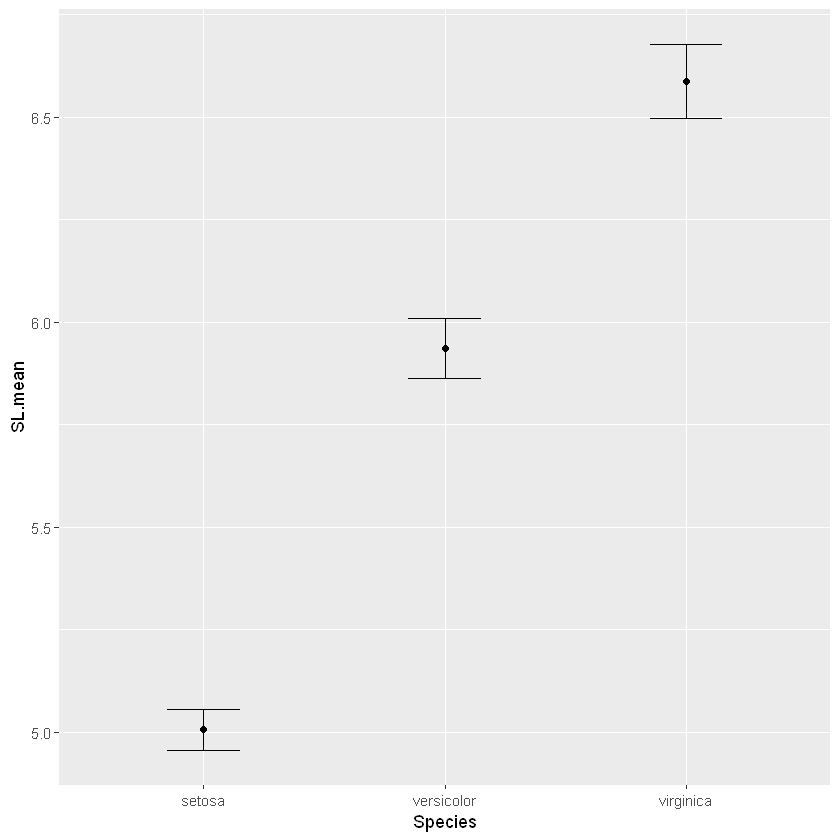

In [6]:
ggplot(data = iris.means, mapping = aes(x = Species, y = SL.mean)) +
  geom_point() +
  geom_errorbar(mapping = aes(ymin = SL.mean - SL.se,
                              ymax = SL.mean + SL.se),
                width = 0.3)

## Test RJSDMX

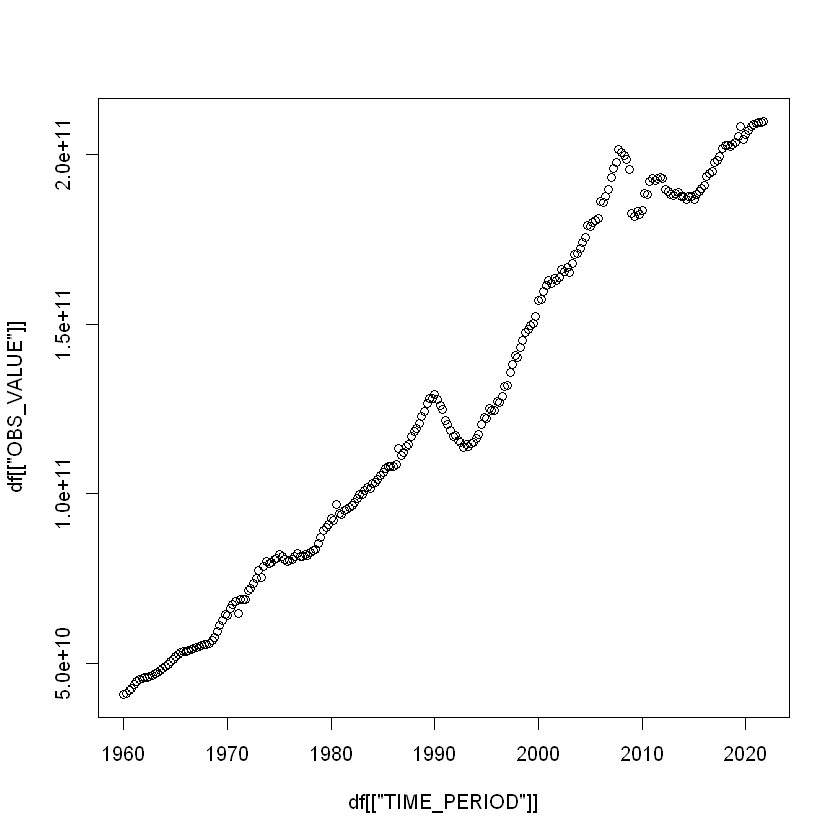

In [7]:
options(warn=-1)
library(RJSDMX)
ticker = "EO.FIN.GDPV.Q"
mylist = getTimeSeries("OECD", ticker)

df = sdmxdf(mylist, meta=F)
df[["TIME_PERIOD"]] = as.Date(as.yearqtr(as.character(df[["TIME_PERIOD"]]), format = "%Y Q%q"))

plot(df[["TIME_PERIOD"]],df[['OBS_VALUE']])